# Hyperparameter Tuning


In [1]:
from data import load_data

train_data, test_data = load_data()

unique_patients = test_data['p_num'].unique()
train_data = train_data[train_data['p_num'].isin(unique_patients)]
test_data = test_data[test_data['p_num'].isin(unique_patients)]

train_data.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


### Define a tuning function

In [2]:
import joblib
import os


def tune(p_num, tuner, X, y):
    model_file_name = f'{p_num}.{tuner.__name__}.model.pkl'
    if os.path.exists(model_file_name):
        print(f'Model {model_file_name} already exists. Loading...')
        model = joblib.load(model_file_name)
        y_pred = model.predict(X)
        tuner.result_summary(y, y_pred, f'{tuner.__name__} (loaded) {p_num}')
        return

    print(f'-----------{tuner.__name__}-----------')
    print('Calculating best hyperparameters...')
    tuner.fit(X, y)
    print('Best hyperparameters found.')
    display(tuner.get_params())
    print(f'RMSE: {tuner.get_rmse()}')
    tuner.show_chart()
    joblib.dump(tuner.get_best_model(), model_file_name)

Model p01.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p01
RMSE: 0.004948941039914069
R2 Score: 0.9999984661979963


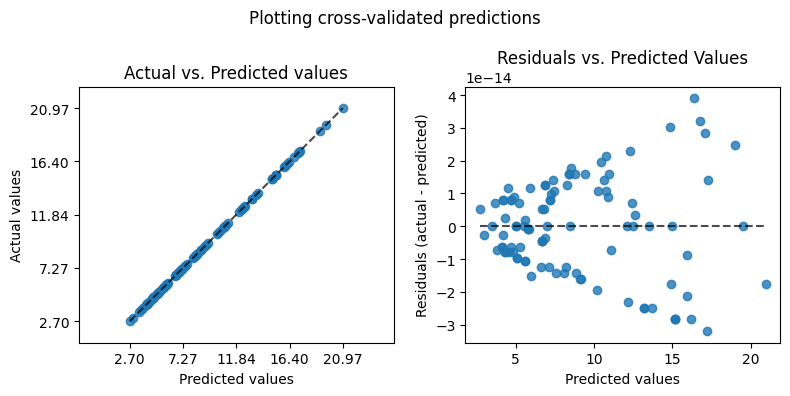

Model p02.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p02
RMSE: 0.038162858278580666
R2 Score: 0.9998465389108396


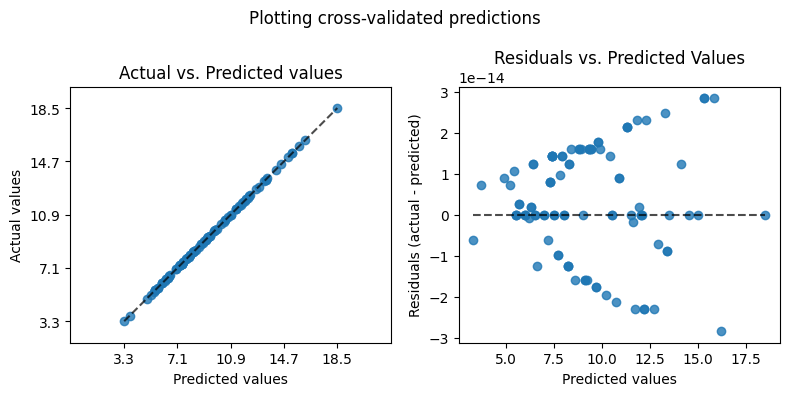

Model p04.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p04
RMSE: 1.1282144423126588e-14
R2 Score: 1.0


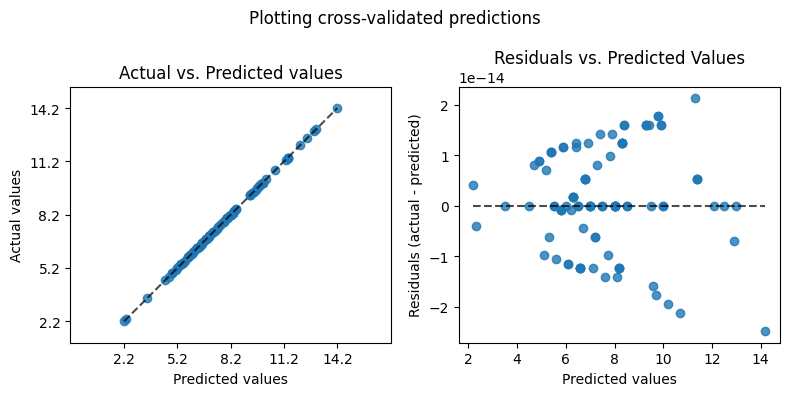

Model p05.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p05
RMSE: 0.0046641252743921035
R2 Score: 0.9999977619408142


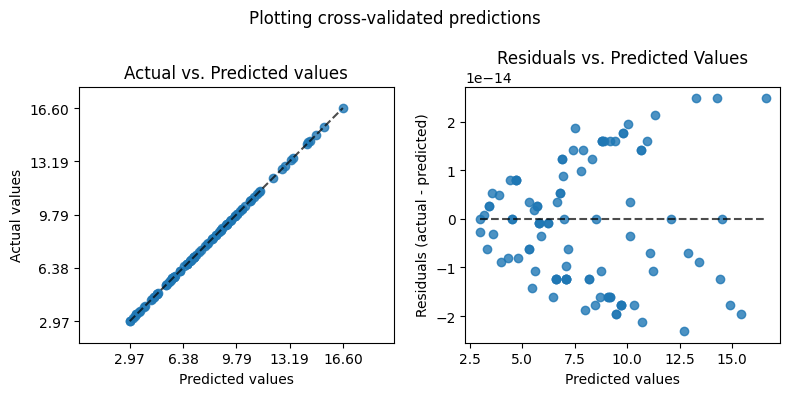

Model p06.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p06
RMSE: 0.001113208944131005
R2 Score: 0.9999999244217573


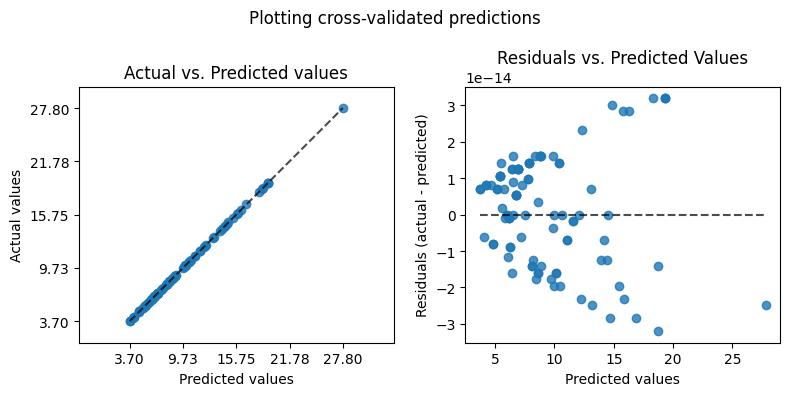

Model p10.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p10
RMSE: 9.382307049986707e-15
R2 Score: 1.0


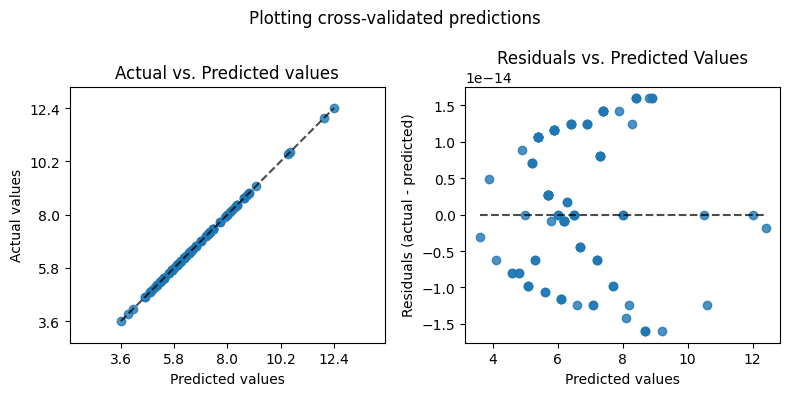

Model p11.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p11
RMSE: 0.02726187737445411
R2 Score: 0.9999062633572088


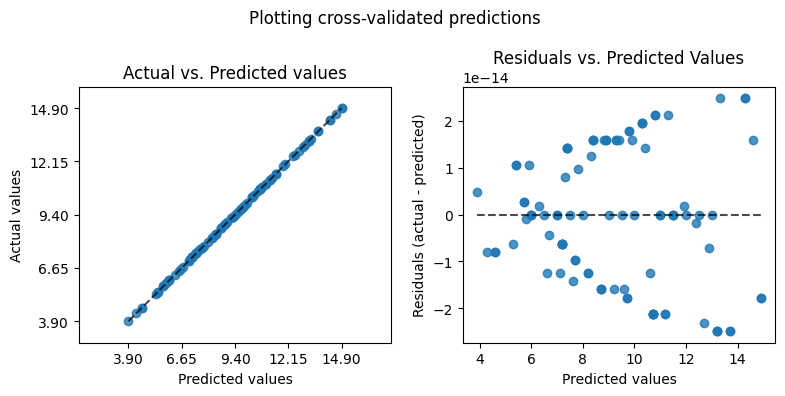

Model p12.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p12
RMSE: 1.1886434646621481e-14
R2 Score: 1.0


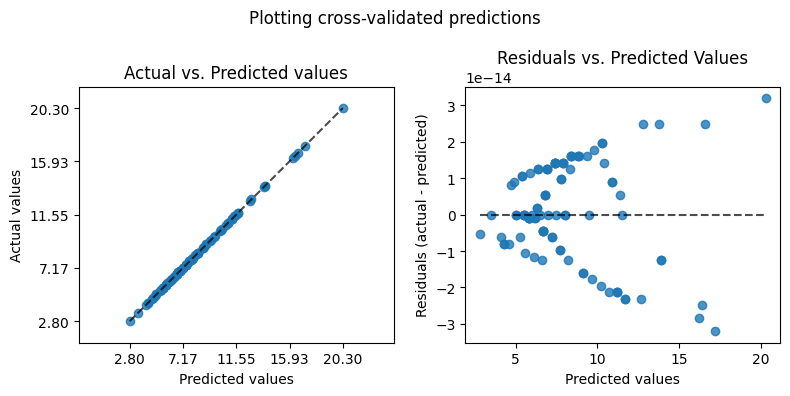

Model p15.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p15
RMSE: 1.2183844127793747e-14
R2 Score: 1.0


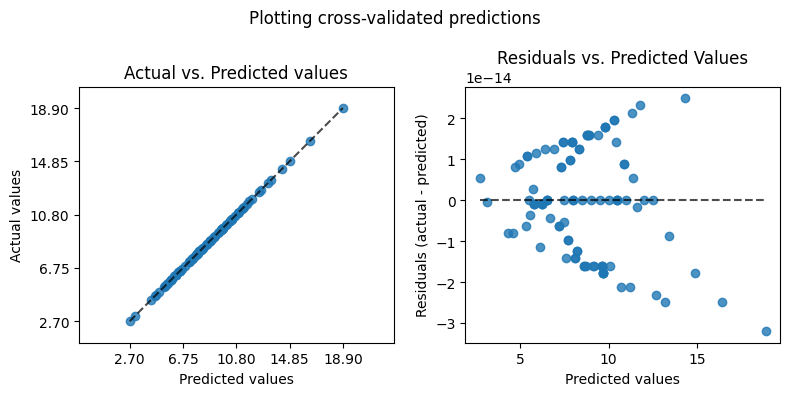

Model p16.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p16
RMSE: 1.2102395324328763e-14
R2 Score: 1.0


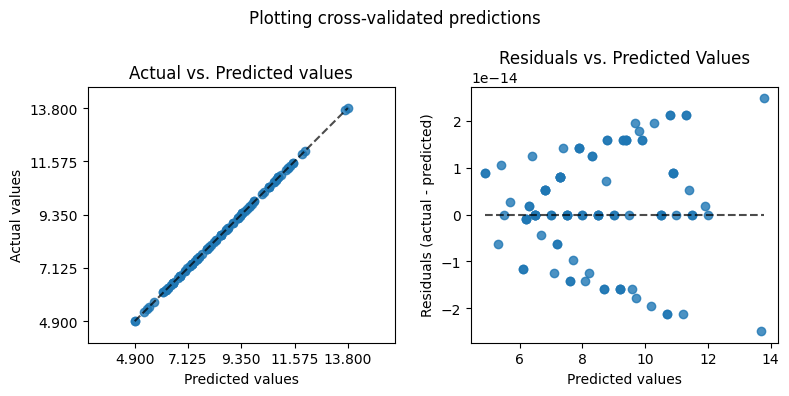

Model p18.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p18
RMSE: 0.021088883039655112
R2 Score: 0.9999726367259908


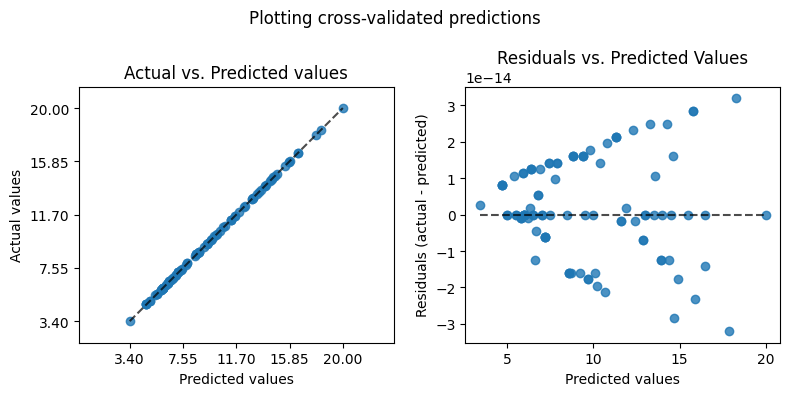

Model p19.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p19
RMSE: 1.2286146912649115e-14
R2 Score: 1.0


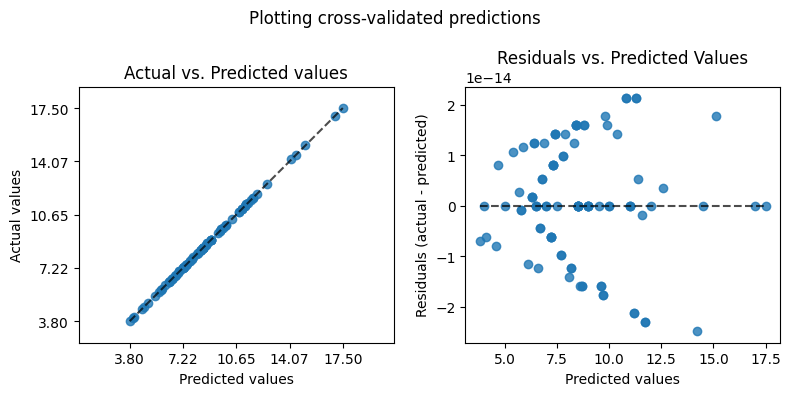

Model p21.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p21
RMSE: 1.6343534188483976e-14
R2 Score: 1.0


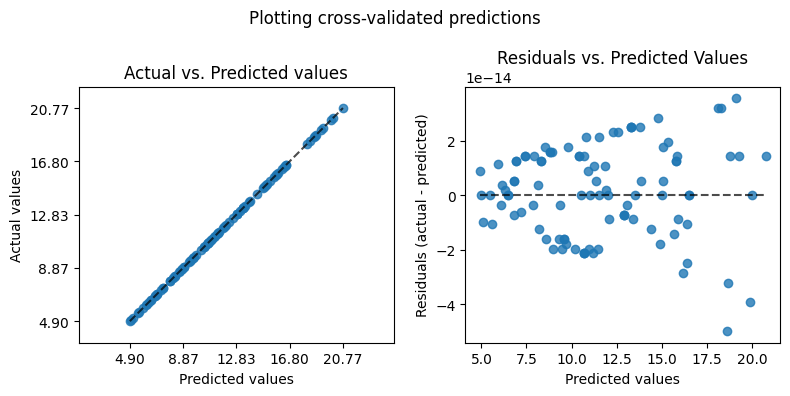

Model p22.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p22
RMSE: 1.1806680430684978e-14
R2 Score: 1.0


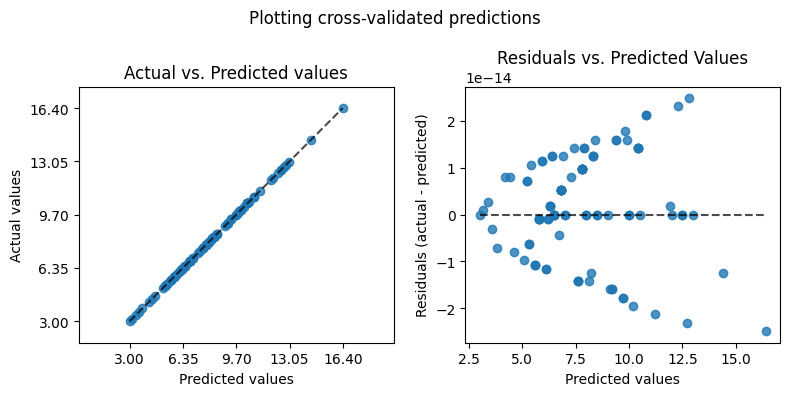

Model p24.ExtraTreesRegressor.model.pkl already exists. Loading...
ExtraTreesRegressor (loaded) p24
RMSE: 1.1360585288202981e-14
R2 Score: 1.0


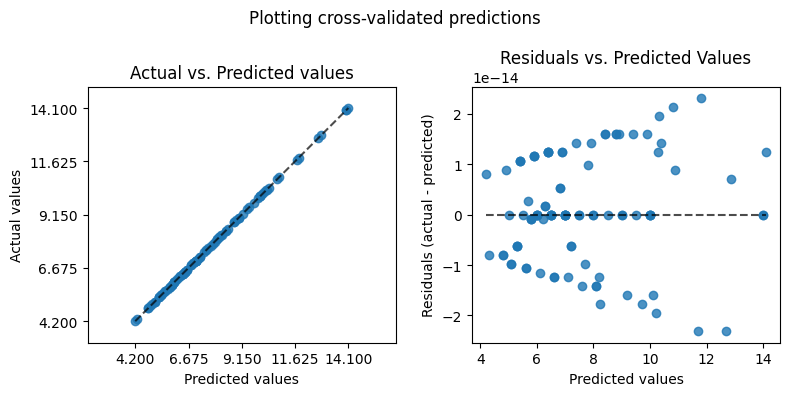

In [3]:
from pipelines import pipeline
from src.features.tuners import ExtraTreesHyperparameterTuner

for patient in unique_patients:
    patient_train_data = train_data[train_data['p_num'] == patient]
    patient_train_data_transformed = pipeline.fit_transform(patient_train_data)

    X_train = patient_train_data_transformed.drop(columns=['bg+1:00'])
    y_train = patient_train_data_transformed['bg+1:00']

    tune(patient, ExtraTreesHyperparameterTuner(search_space=None), X_train, y_train)